In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import statsmodels

In [2]:
import statsmodels.api
from scipy.special import factorial

In [10]:
dados = pd.read_csv('dados.csv')

In [26]:
amostra = dados.query('Renda < 5000').sample(n = 20, random_state=101)

In [27]:
amostra[['Idade', 'Renda', 'Anos de Estudo', 'Altura']].cov()

,Idade,Renda,Anos de Estudo,Altura
Idade,134.410526,-4947.968421,-16.410526,0.016506
Renda,-4947.968421,764668.326316,2209.021053,-7.138236
Anos de Estudo,-16.410526,2209.021053,16.936842,0.111281
Altura,0.016506,-7.138236,0.111281,0.003354


In [28]:
amostra.Idade.var()

134.4105263157895

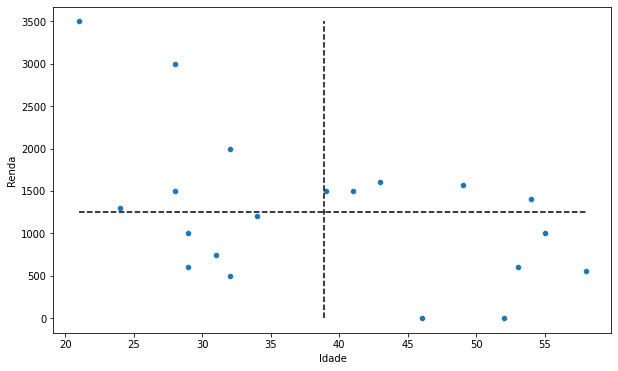

In [33]:
x = amostra.Idade
y = amostra['Renda']

ax = sns.scatterplot(x=x, y=y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyle='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyle='dashed')

In [36]:
dp_x = dados.Idade.std()
dp_y = dados.Renda.std()
print(dp_x, dp_y)

12.48058346535974 3323.3877303464037


In [40]:
d = dados[['Idade', 'Renda']].cov()
d = d.Idade.loc['Renda']
print(d)

1715.405106842685


In [41]:
d/(dp_x * dp_y)

0.04135716851470604

In [42]:
dados[['Idade', 'Renda']].corr()

,Idade,Renda
Idade,1.000000,0.041357
Renda,0.041357,1.000000


In [43]:
z = 2178803.59
w = 7328865.85
b = 667839.78
w = np.sqrt(w)
b = np.sqrt(b)

z/(w*b)

0.984835179852382

In [3]:
dataset = {
    'Y': [670, 220, 1202, 188, 1869, 248, 477, 1294, 816, 2671, 1403, 1586, 3468, 973, 701, 5310, 10950, 2008, 9574, 28863, 6466, 4274, 6432, 1326, 1423, 3211, 2140], 
    'X': [1.59, 0.56, 2.68, 0.47, 5.2, 0.58, 1.32, 3.88, 2.11, 5.53, 2.6, 2.94, 6.62, 1.91, 1.48, 10.64, 22.39, 4.2, 21.9, 59.66, 14.22, 9.57, 14.67, 3.28, 3.49, 6.94, 6.25]
}
dataset = pd.DataFrame(dataset)

In [4]:
dataset.head()

,Y,X
0,670,1.59
1,220,0.56
2,1202,2.68
3,188,0.47
4,1869,5.20


In [8]:
import statsmodels.api as sm

In [9]:
Y = dataset.Y
X = sm.add_constant(dataset.X)

In [10]:
resultado_regressao = sm.OLS(Y, X, missing='drop').fit()

In [11]:
resultado_regressao.params

const   -168.321156
X        481.390397
dtype: float64